# Titanic: Machine Learning from Disaster
##### Prevendo os sobreviventes com a utilização de Regressão Linear
---
Solução para a competição "Titanic: Machine Learning from Disaster" utilizando Regressão Linear.

A análise abaixo é de caráter exploratório, apenas para aprender o básico da importação e tratamento de dados no Python, além de demonstrar que o método de Regressão Linear pode ser poderoso e ao mesmo tempo de simples implementação. 

*Carlos Melo*
<a href="https://www.linkedin.com/in/carlosfab/"><img src="https://brand.linkedin.com/etc/designs/linkedin/katy/global/clientlibs/img/default-share.png" width=150></a>

---

## Definição do problema

O naufrágio do Titanic foi um dos maiores desastres na história. Ocorrido em 15 de abril de 1912, após uma colisão com um *iceberg*, o navio afundou. O saldo final da tragédia foi um total de 1502 mortos de um total de 2224 pessoas (incluindo passageiros e tripulação). Um dos motivos para o grande número de vítimas (cerca de 68%) diz respeito à quantidade de botes bem inferior ao mínimo que seria necessário.

Nessa situação, apesar do fator "sorte" ter feito parte na sobrevivência dos passageiros do Titanic, existiram grupos de pessoas que tinham uma maior probabilidade de escaparem da morte (como por exemplo mulheres, crianças e passageiros viajando na primeira-classe), como informa a [descrição do próprio desafio](https://www.kaggle.com/c/titanic).

Dentro desse contexto, o site [Kaggle](http://www.kaggle.com) fornece então um conjunto de dados aos competidores do desafio, contendo algumas informações (nome, idade, sexo, sobreviveu(sim/não), etc.) sobre 891 passageiros. É esperado que o competidor conduza uma análise e crie um modelo capaz de prever, com a maior acurácia possível, a condição de sobrevivência para os passageiros restantes (*dataset* de teste).

Um vídeo com a descrição do acidente do Titanic pode ser visto no link abaixo.

<a href="https://www.youtube.com/watch?v=9xoqXVjBEF8
" target="_blank"><img src="https://img.youtube.com/vi/9xoqXVjBEF8/0.jpg" 
alt="TITANIC sinking" width="240" height="180" border="10" /></a>

## Aquisição dos dados

[O Kaggle fornece os dados](https://www.kaggle.com/c/titanic/data) no formato'.csv'. Os mesmos são divididos em:

* conjunto de treinamento (train.csv): para ser utilizado para construir os modelos de *machine learning*. Neste arquivo, é conhecido se cada passageiro sobreviveu ou não.
* conjunto de teste (test.csv): para verificar o quão bom o modelo construido é com dados não observados até então. Neste aqruivo, não é fornecida a condição de sobrevivência para cada passageiro. O modelo construído é que deve fazer essa previsão.

Será utilizado, primariamente, a biblioteca *Pandas* para se trabalhar com os dados do Titanic.

In [1]:
# Análise de dados
import pandas as pd
import numpy as np


# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Classe de Regressão Linear
from sklearn.linear_model import LinearRegression

# Validação cruzada
from sklearn.cross_validation import KFold

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando banco de dados de treinamento e teste como Dataframes
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

## Preparação e limpeza dos dados
** Informações e visualização dos dados importados**

Inicialmente, vamos ver as primeiras 5 entradas e as 5 últimas entradas das variáveis, a fim de gerar um conhecimento inicial de como o Dataframe está estruturado.

In [3]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train_data.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

**Significado das variáveis**

Com as 5 primeiras entradas impressas na tela, pode-se ter então uma noção de como os dados estão estruturados, bem como quais são as variáveis mais importantes para o início da investigação. Segue o significado de cada coluna do DataFrame:

* *PassengerId:* ID do passageiro
* *Survived:* Sobreviveu (== 0) ou Faleceu (== 1)
* *Pclass:* Classe do passageiro (1st, 2nd, 3rd)
* *Name:* Nome do passageiro
* *Sex:* Sexo do passageiro
* *Age:* Idade
* *SibSp:* Número de irmãos/cônjuge a bordo (define as relações familiares)
* *Parch:* Número de pais/filhos a bordo (crianças viajando com babás apenas, recebem *parch* = 0)
* *Ticket:* Número do *ticket* de embarque
* *Fare:* Tarifa paga pelo passageiro
* *Cabin:* Número da cabine
* *Embarked:* Porto de embarque

A seguir, serão olhadas algumas outras informações sobre as variáveis, a fim de identificar o tipo de variável, a contagem do número de entradas para cada uma (para auxiliar a encontrar dados faltando ou fragmentados), valores mínimos e máximos, médias, etc.



In [5]:
print('_'*40)
train_data.info()
print('_'*40)
train_data.describe()

________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

O método .info() retorna um resumo conciso do DataFrame, permitindo identificar o tipo da variável em cada coluna. Já o método .describe() retorna diferentes características das colunas numéricas do DataFrame.

Com isso, é possível identificar que as colunas que possuem valores nulos ou em branco (ou seja, seus dados precisam ser corrigidos) são:
 * ~~'Cabin'~~
 * 'Age'
 * 'Embarked'
 
 Como existem poucos valores lançados para a categoria 'Cabin', além de não se enxergar inicialmente nenhuma influênca, preferiu-se desconsiderar esta coluna.
 
Na coluna 'Age', os valores NaN serão substituidos pela sua mediana, o que parece ser mais razoável que excluir uma linha inteira que pode conter outros dados importantes. Na coluna 'Embarked', as lacunas serão substituidas pelo valor de maior frequência.

In [6]:
# Verificando a frequência dos valores de 'Embarked'
print(train_data['Embarked'].unique())
print(train_data['Embarked'].value_counts())
# Substituindo os valores nulos de 'Embarked' por 'S'
train_data.loc[train_data['Embarked'].isnull(), 'Embarked'] = 'S'

# Substituindo os valores nulos de 'Age' pela mediana da coluna
train_data.loc[train_data['Age'].isnull(), 'Age'] = train_data['Age'].median()

# Verificando 'Age' com o método .describe(), agora sem dados nulos (NaN)
train_data['Age'].describe(percentiles=[.1, .25, .5, .75, .99])

['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
10%       16.000000
25%       22.000000
50%       28.000000
75%       35.000000
99%       65.000000
max       80.000000
Name: Age, dtype: float64

## Análise, identificação de padrões e exploração dos dados


Inicialmente, vamos considerar a hipótese de que crianças e mulheres teriam tido mais chances de sobreviver, uma vez que provavelmente foram as primeiras a serem embarcadas nos botes.

Para isso, vamos ver a porcentagem de sobreviventes na categoria 'Sex', analisar o histograma da distribuição das idades, classificar todos os passageiros em 3 grupos (Crianças, adultos e idosos) para vermos a porcentagem de sobreviventes em cada uma delas, e por último analisar se há diferença entre os passageiros das diferentes classes no navio.

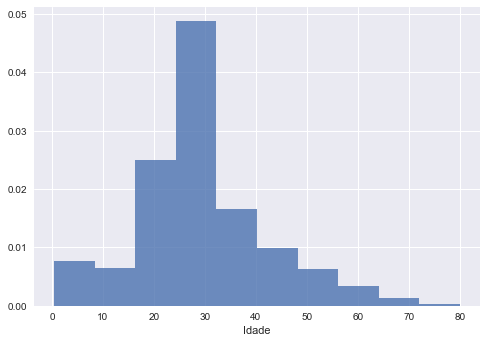

In [7]:
# Histograma de idades
sns.set()
plt.hist(train_data['Age'], normed=True, alpha=.8)
plt.xlabel("Idade")
plt.show()

['male' 'female']
        Survived
Sex             
female  0.742038
male    0.188908


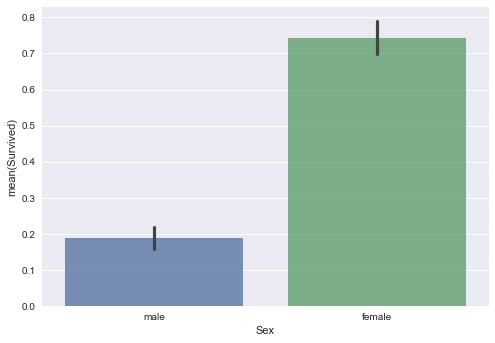

In [8]:
print(train_data['Sex'].unique())
print(train_data[['Sex', "Survived"]].groupby(['Sex']).mean())
plot = sns.barplot(x='Sex', y='Survived', data=train_data, alpha=.8)

           Survived
Age_Group          
Adulto     0.365059
Criança    0.539823
Idoso      0.090909


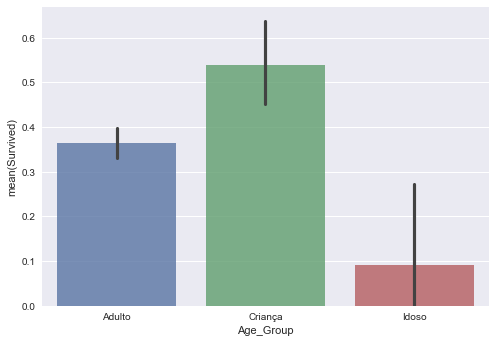

In [9]:
def check_age(age):
    """ Identifica o grupo etário do qual o passageiro faz parte.
    
    :param age: <float> representando a idade do passageiro
    :return: <string> com o grupo etário equivalente
    """
    if age < 18:
        return 'Criança'
    elif (age >= 18 ) and (age < 65):
        return 'Adulto'
    else:
        return 'Idoso'

train_data['Age_Group'] = train_data['Age'].apply(check_age)
print(train_data[['Age_Group', 'Survived']].groupby(['Age_Group']).mean())

plot = sns.barplot(x='Age_Group', y='Survived', data = train_data, alpha=.8)

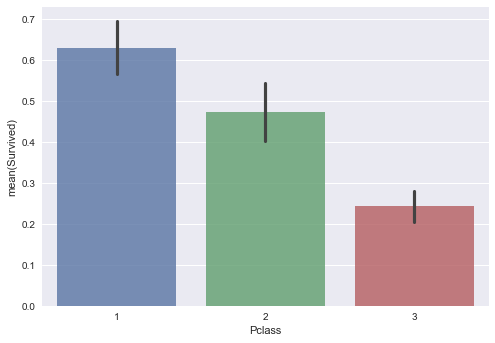

In [10]:
plot = sns.barplot(x='Pclass', y='Survived', data = train_data, alpha=.8)

In [11]:
print(train_data[['Embarked', 'Survived']].groupby(['Embarked']).mean())

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


** Análise preliminar**

* A categoria 'Survived' é binária. Ou seja, 1 caso o passageiro tenha sobrevivido; 0 caso tenha falecido.
* Cerca de 62% dos passageiros do *dataset* de treino não sobreviveram, ficando próximo à porcentagem do total de 68% (1502 não-sobreviventes / 2224 passageiros).
* Cerca de 75% dos passageiros têm até 35 anos.
* Menos de 1% dos passageiros têm mais de 65 anos.
* Alinhado com a hipótese inicial, mulheres e crianças sobreviveram proporcionalmente mais.
* Passageiros que embarcaram pelo Porto 'C' sobreviveram mais que 'Q' e 'S'.

**Convertendo *Sex* e *Embarked* para valores numéricos**

Como as colunas *Sex* e *Embarked* parecem ser bastante informativas, iremos convertê-las para valores numéricos. Assim, o algoritmo de *machine learning* poderá utilizá-las para fazer previsões.

In [12]:
# 'Sex'        male = 0   female = 1
train_data.loc[train_data['Sex'] == 'male', 'Sex'] = 0
train_data.loc[train_data['Sex'] == 'female', 'Sex'] = 1

# 'Embarked'   'S' = 0    'C' = 1    'Q' = 2
train_data.loc[train_data['Embarked'] == 'S', 'Embarked'] = 0
train_data.loc[train_data['Embarked'] == 'C', 'Embarked'] = 1
train_data.loc[train_data['Embarked'] == 'Q', 'Embarked'] = 2

## Previsões com *Machine Learning*

A Regressão Linear pode ser definida como uma equação que visa estimar o valor esperado de uma variável *y*, dados alguns valores de outras variáveis *x*. A mesma considera que as relações existentes entre as variáveis dependentes e as de entradas são lineares, do tipo *y = mx + b*. Neste caso, o valor de *y* é o que queremos prever, *m* é um coeficiente angular, *x* é o valor de uma dada coluna*, e *b* é uma constante. 

Apesar desse modelo de previsão ser poderoso, tem alguns pontos negativos, como por exemplo o fato de não conseguir captar as não-lineariedades que possam existir no *dataset* de treino, e também o fato de não apresentar probabilidades de sobrevivência (apresenta apenas o valor binário).

**Validação Cruzada**
A validação cruzada servirá para treinarmos o algoritmo em um conjunto de dados diferentes daqueles em que faremos a previsão. Este passo é considerado crítico para se evitar um *overfitting* do modelo (ou seja, evitar um *fit* no ruído).

Utilizaremos o Método k-fold para a validação cruzada, quando dividiremos os dados em 3 partes (*folds*) e procederemos da seguinte maneira:
* Combinar as duas primeiras partes, treinar o modelo e fazer a previsão na terceira parte;
* Combinar a primeira e terceira parte, treinar o modelo e fazer a previsão na segunda; e
* Combinar a segunda e a terceira parte, treinar o modelo e fazer a previsão na primeira.

Faremos uso da biblioteca (excelente!) *scikit-learn*, que facilita muito o fluxo de trabalho.

In [13]:
# Colunas que serão utilizadas para fazer a previsão
predictors = ['Sex', 'Age', 'Pclass', 'Embarked']

# Inicialização da classe do algoritmo
algorithm = LinearRegression()
folds = KFold(train_data.shape[0], n_folds=3, random_state=0)
# Visualizar a estrutura da variável folds
# for train_index, test_index in folds:
#     print("Train: ", train_index, "Test: ", test_index)

predictions = []
for train_index, test_index in folds:
    train_predictors = train_data[predictors].iloc[train_index, :]
    train_target = train_data['Survived'].iloc[train_index]
    # Treinando o algoritmo utilizando os predictos e o target (survived?)
    algorithm.fit(train_predictors, train_target)
    # Fazendo previsões
    test_predictions = algorithm.predict(train_data[predictors].iloc[test_index, :])
    predictions.append(test_predictions)
    
# Como criamos 3 conjuntos de teste, o output é uma list de len() = 3. Para cara item da lista, 
# é armazenado um valor para cada passageiro do conjunto de teste
print("len(predictions) :", len(predictions))
print("5 primeiras entradas da variável predictions: ", predictions[0][0:5])

len(predictions) : 3
5 primeiras entradas da variável predictions:  [ 0.09445602  0.96588768  0.54180569  0.92949341  0.03164796]


Como os únicos valores para a coluna 'Survived' são 0 ou 1, iremos transformar as previsões de cada passageiro seguindo o critério:
* ( > 0.5 ) = 1
* ( <= 0.5 ) = 0

Com isso, basta calcular quantos acertos o nosso algoritmo teve e calcular a acurácia do modelo.

Apesar de 78% de acertos estar longe do ideal, a aplicação de métodos de Regressão Linear foi capaz de capturar e transmitir para a equação algumas correlações importantes. Como próximo passo, vamos processar a variável de teste do modelo (idêntico aos passos que utilizamos no *dataset* de treino), enviar para o Kaggle e verificar a nossa taxa de acerto.

In [14]:
predictions = np.concatenate(predictions)
# Transformando as previsões em valores binários
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

# Calcular a acurácia da previsão do algoritmo
accuracy = sum(predictions[predictions == train_data['Survived']]) / predictions.shape[0]
print('Acurácia: {0:.2f}%'.format(100*accuracy))

Acurácia: 78.34%


## Gerando um arquivo para enviar ao Kaggle

Seguiremos os mesmo passos de limpeza de dados e conversões numéricas para algumas variáveis.

Ao final, geraremos um arquivo .csv para submeter ao Kaggle, e verificar então como nosso algoritmo foi no *dataset* de teste.

In [15]:
# Preenchendo os valores NaN com a mediana da idade
test_data.loc[test_data['Age'].isnull(), 'Age'] = test_data['Age'].median()

# Conversão dos valores da coluna 'Sex'
# 'Sex'        male = 0   female = 1
test_data.loc[test_data['Sex'] == 'male', 'Sex'] = 0
test_data.loc[test_data['Sex'] == 'female', 'Sex'] = 1

# Conversão dos valores da coluna 'Embarked'
# 'Embarked'   'S' = 0    'C' = 1    'Q' = 2
test_data.loc[test_data['Embarked'] == 'S', 'Embarked'] = 0
test_data.loc[test_data['Embarked'] == 'C', 'Embarked'] = 1
test_data.loc[test_data['Embarked'] == 'Q', 'Embarked'] = 2

# Agora, treinaremos o algoritmo com o dataset de treino completo (sem dividir com KFold)
algorithm = LinearRegression()
algorithm.fit(train_data[predictors], train_data['Survived'])
# Previsões em cima do dataset de teste
predictions = algorithm.predict(test_data[predictors])

# Coneversão do resultado para valores binários
predictions[predictions > 0.5] = int(1)
predictions[predictions <= 0.5] = int(0)

# Gerando o arquivo csv para envio 
# São necessárias apenas duas colunas no arquivo: 'PassengerId' e 'Survived'
kaggle = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
# Convertendo a coluna de float para int (caso contrário, o site dará erro)
kaggle['Survived'] = kaggle['Survived'].astype(dtype='int64')

kaggle.to_csv('kaggle.csv', index=False)

## Resultado final

Após o envio para o Kaggle, foi computado um *Score* de 75% de acertos, alinhado com a acurácia que o modelo havia apresentado no *dataset* de treino.

<a href="https://ibb.co/iyVhBF"><img src="https://preview.ibb.co/hTdr5a/Screenshot_2017_03_07_01_15_52.png" alt="Screenshot 2017 03 07 01 15 52" border="0" /></a>

Como foi dito no começo, a Regressão Linear apresenta bons resultados e é simples de implementar. Há, no entanto, outros algoritmos melhores, como o *Random Forest*, que tem um melhor potencial para elevar a taxa de acerto.

Mas como o carater desta análise era apenas epxloratório, creio que serviu para o propósito de aprendizado (meu, principalmente). Quaisquer dúvidas ou sugestões serão muito bem vindas. Obrigado!